In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!curl -L -o data/smith/GSE51239_RAW.tar https://ftp.ncbi.nlm.nih.gov/geo/series/GSE51nnn/GSE51239/suppl/GSE51239_RAW.tar

In [3]:
#!tar -xf data/smith/GSE51239_RAW.tar --directory data/smith

In [60]:
sample="GSM1240867_hBlast-2"

In [52]:
file = "data/smith/raw/{sample}.cpgs.txt"
columnames = ["chromosome", "pos", "unmethyl", "methyl"]
with open(file, "r") as f:
    lines = f.readlines()
    df = pd.DataFrame([line.strip().split("\t") for line in lines], columns=columnames)
df

,chromosome,pos,unmethyl,methyl
0,chr1,10496,25,1
1,chr1,10524,25,0
2,chr1,10562,18,0
3,chr1,10570,17,0
4,chr1,10576,18,0
...,...,...,...,...
3169677,chrX,155259174,23,1
3169678,chrX,155259188,24,2
3169679,chrX,155259190,22,2
3169680,chrX,155259196,22,0


In [53]:
df['methyl']=pd.to_numeric(df.methyl)
df['unmethyl']=pd.to_numeric(df.unmethyl)
df['methyl_level']=df.methyl/(df.methyl+df.unmethyl)
df['sum_count']=df.methyl+df.unmethyl
df=df[df.sum_count >= 5]
df

,chromosome,pos,unmethyl,methyl,methyl_level,sum_count
0,chr1,10496,25,1,0.038462,26
1,chr1,10524,25,0,0.000000,25
2,chr1,10562,18,0,0.000000,18
3,chr1,10570,17,0,0.000000,17
4,chr1,10576,18,0,0.000000,18
...,...,...,...,...,...,...
3169676,chrX,155259170,23,1,0.041667,24
3169677,chrX,155259174,23,1,0.041667,24
3169678,chrX,155259188,24,2,0.076923,26
3169679,chrX,155259190,22,2,0.083333,24


(array([1077584.,   70678.,  127137.,  178663.,  138952.,  166805.,
         223617.,  130276.,  138198.,   88016.,  137641.,   53724.,
          69453.,   23145.,   17541.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       ]),
 <BarContainer object of 15 artists>)

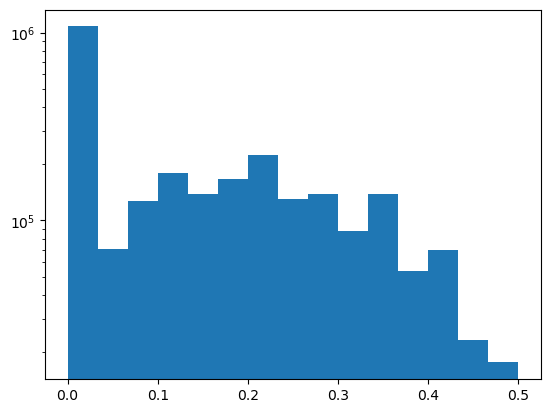

In [54]:
plt.hist(df.methyl_level, bins=15, log=True)

(array([2.640634e+06, 4.220000e+02, 1.500000e+02, 9.700000e+01,
        3.800000e+01, 3.300000e+01, 1.900000e+01, 1.400000e+01,
        7.000000e+00, 2.000000e+00, 3.000000e+00, 2.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.000000e+00, 0.000000e+00, 0.00

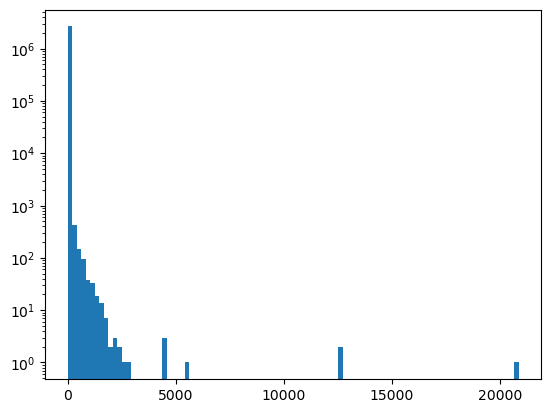

In [56]:
plt.hist(df.sum_count, bins=100, log=True)

In [57]:
len(df)

2641430

# Save as parquet

In [3]:
from pathlib import Path
import os
import glob
import re

In [4]:
files=glob.glob(
    "data/smith/raw/*_h*.cpgs.txt"
)
files[:5]

['data/smith/raw/GSM1240879_hESp1-E4.cpgs.txt',
 'data/smith/raw/GSM1240871_hICM-1.cpgs.txt',
 'data/smith/raw/GSM1240881_hESp5-E4.cpgs.txt',
 'data/smith/raw/GSM1240875_hESp0-E1.cpgs.txt',
 'data/smith/raw/GSM1240872_hICM-2.cpgs.txt']

In [5]:
samples = [o.split('_')[-1].removesuffix(".cpgs.txt") for o in files]
samples[:5]

['hESp1-E4', 'hICM-1', 'hESp5-E4', 'hESp0-E1', 'hICM-2']

In [6]:
samples_metadata = pd.DataFrame({'file_path':files}, index = samples)
samples_metadata[:5]

,file_path
hESp1-E4,data/smith/raw/GSM1240879_hESp1-E4.cpgs.txt
hICM-1,data/smith/raw/GSM1240871_hICM-1.cpgs.txt
hESp5-E4,data/smith/raw/GSM1240881_hESp5-E4.cpgs.txt
hESp0-E1,data/smith/raw/GSM1240875_hESp0-E1.cpgs.txt
hICM-2,data/smith/raw/GSM1240872_hICM-2.cpgs.txt


In [7]:
def sample_df(sample, file_path, min_cov=5):
    cols = ["chromosome", "pos", "unmethyl", "methyl"]

    df = (
        pd.read_csv(file_path,
                    sep="\t",
                    names=cols,
                    usecols=cols,              # ignore extra cols if present
                    dtype={
                        "chromosome": "string",
                        "pos": "int32",
                        "unmethyl": "int32",
                        "methyl": "int32"
                    },
                    engine="c",                # fastest, default
        )
        .assign(sum_count=lambda d: d.methyl + d.unmethyl)
        .loc[lambda d: d.sum_count >= min_cov, :]     # early filtering
        .assign(**{sample: lambda d: d.methyl / d.sum_count})
        .loc[:, ["chromosome", "pos", sample]]
    )
    return df

sample_df(samples_metadata.index[0],samples_metadata.file_path.iloc[0])

,chromosome,pos,hESp1-E4
0,chr1,10496,0.400000
1,chr1,10524,0.470588
2,chr1,10562,0.462687
3,chr1,10570,0.478261
4,chr1,10576,0.428571
...,...,...,...
3344058,chrX,155259174,0.442857
3344059,chrX,155259188,0.350000
3344060,chrX,155259190,0.377049
3344061,chrX,155259196,0.472973


In [ ]:
dfs = []
for idx, row in samples_metadata.iterrows():
    df = sample_df(idx, row["file_path"])
    dfs.append(df.set_index(["chromosome", "pos"]))   # gives a MultiIndex

df_all = pd.concat(dfs, axis=1, sort=False).reset_index()
df_all.to_parquet(path = "data/smith/processed/cpgs_5_cov.parquet")

In [13]:
df_all

,chromosome,pos,hESp1-E4,hICM-1,hESp5-E4,hESp0-E1,hICM-2,hBlast-1,hSperm-533-90,hESp0-E4,...,hBlast-2,hESp5-E5,hBlast-3,hSperm-530-90,hTE-2,hESp1-E5,hTE-1,hSperm-534-90,hBlastSingle-5,h8c-1
0,chr1,10496,0.400000,0.000000,0.437500,0.479592,0.075000,0.066667,NaN,0.447368,...,0.038462,0.482759,0.000000,0.000000,0.000000,0.450980,0.084507,0.0,0.00000,0.000000
1,chr1,10524,0.470588,0.014286,0.485714,0.468750,0.000000,0.062500,NaN,0.440000,...,0.000000,0.491228,0.041667,0.016393,0.019231,0.434343,0.000000,0.0,0.00000,0.049180
2,chr1,10562,0.462687,0.065574,0.470588,0.438356,0.022727,0.000000,0.0,0.428571,...,0.000000,0.463415,0.000000,0.036364,0.012658,0.460317,0.000000,0.0,0.00000,0.022222
3,chr1,10570,0.478261,0.017857,0.500000,0.481013,0.023256,0.000000,0.0,0.437500,...,0.000000,0.488372,0.000000,0.000000,0.000000,0.492308,0.000000,0.0,0.00000,0.000000
4,chr1,10576,0.428571,0.000000,0.357143,0.369231,0.022727,0.062500,0.0,0.300000,...,0.000000,0.476190,0.000000,0.000000,0.000000,0.451613,0.000000,0.0,0.02439,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530136,chrX,150723725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3530137,chrX,150723735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
3530138,chrX,153107846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000
3530139,chrX,153247572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000
